<a href="https://colab.research.google.com/github/abhimithra02/Innomatics_internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML,display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

In [ ]:
os.chdir("A:\DATA\Programms")
data=pd.read_csv("Data.csv")
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [ ]:
data.isnull().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

# MEAN

Function can be used to calculate mean/average of a given list of numbers. It returns mean of the data set passed as parameters.

Arithmetic mean is the sum of data divided by the number of data-points. It is a measure of the central location of data in a set of values which vary in range. In Python, we usually do this by dividing the sum of given numbers with the count of number present.



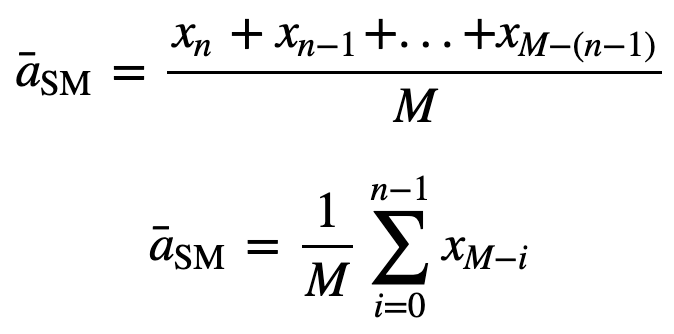

In [ ]:
for i in data.columns:
   if data[i].dtypes !='O':
       count = 0
       sum = 0
       for lm in data[i]:
           sum+=lm
           count+=1
       print("Mean of",i,"=",sum/count)

Mean of Mthly_HH_Income = 41558.0
Mean of Mthly_HH_Expense = 18818.0
Mean of No_of_Fly_Members = 4.06
Mean of Emi_or_Rent_Amt = 3060.0
Mean of Annual_HH_Income = 490019.04
Mean of No_of_Earning_Members = 1.46


# Median

Median is the middle number in a sorted list of numbers. To determine the median value in a sequence of numbers, the numbers must first be sorted, or arranged, in value order from lowest to highest or highest to lowest. The median can be used to determine an approximate average, or mean, but is not to be confused with the actual mean.


If there is an odd amount of numbers, the median value is the number that is in the middle, with the same amount of numbers below and above.
If there is an even amount of numbers in the list, the middle pair must be determined, added together, and divided by two to find the median value.

![image.png](attachment:image.png)


In [ ]:
n = len(data)
for i in data.select_dtypes(exclude = ['object']):
    S = sorted(data[i])
    if n %2 == 0:
        m1 = S[n//2]
        m2 = S[n//2 - 1]
        median = (m1+m2)/2
    else:
        median = S[n//2]
    print('Median of {} is {}'.format(i,median))

Median of Mthly_HH_Income is 35000.0
Median of Mthly_HH_Expense is 15500.0
Median of No_of_Fly_Members is 4.0
Median of Emi_or_Rent_Amt is 0.0
Median of Annual_HH_Income is 447420.0
Median of No_of_Earning_Members is 1.0


In [ ]:
data.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

# MODE
The value occurring most frequently in a set of observations is its mode. In other words, the mode of data is the observation having the highest frequency in a set of data. There is a possibility that there exists more than one observation having the same frequency, i.e. a data set could have more than one mode. In such a case, the set of data is said to be multimodal.

Example: The following table represents the number of wickets taken by a bowler in 10 matches. Find the mode of the given set of data.

![image.png](attachment:image.png)


In [ ]:
for col in data.columns:
    n =0
    l1 = []
    l = list(data[col].unique())
    for i in l:
        a = list(data[col]).count(i)
        if a not in l1:
            l1.append(a)
        mode_value = sorted(l1,reverse = True)[0]
    for i in l:
        a = list(data[col]).count(i)
        if(a == mode_value):
            print(col + "Mode is", i)
            break

Mthly_HH_IncomeMode is 45000
Mthly_HH_ExpenseMode is 25000
No_of_Fly_MembersMode is 4
Emi_or_Rent_AmtMode is 0
Annual_HH_IncomeMode is 590400
Highest_Qualified_MemberMode is Graduate
No_of_Earning_MembersMode is 1


In [ ]:
data.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


# Variance

To calculate the variance in a dataset, we first need to find the difference between each individual value and the mean. The variance is the average of the squares of those differences. We can express the variance with the following math expression:

In this equation, xi stands for individual values or observations in a dataset. μ stands for the mean or average of those values. n is the number of values in the dataset.

![image-2.png](attachment:image-2.png)

The term xi - μ is called the deviation from the mean. So, the variance is the mean of square deviations. That's why we denoted it as σ2.



In [ ]:
sum = 0
var = 0
for i in range(len(data['Mthly_HH_Income'])):
    sum =sum + data['Mthly_HH_Income'][i]
n =len(data['Mthly_HH_Income'])
mean = sum/n
for i in range(len(data['Mthly_HH_Income'])):
    var = var + (data['Mthly_HH_Income'][i] - mean)**2
variance = var / (n-1)
print("Variance is",variance)

Variance is 681100853.0612245


# Standard deviation
In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

![image-2.png](attachment:image-2.png)


\sigma	=	population standard deviation

N	=	the size of the population

x_i	=	each value from the population

\mu	=	the population mean

In [ ]:
observation = (data['Mthly_HH_Income'])
sum=0
for i in range(len(observation)):
    sum+=observation[i]
mean_of_observations = sum/len(observation)
sum_of_squared_deviation = 0
for i in range(len(observation)):
    sum_of_squared_deviation+=(observation[i]- mean_of_observations)**2
Standard_Deviation = ((sum_of_squared_deviation)/len(observation))**0.5
print("Standard Deviation of sample is ",Standard_Deviation)

Standard Deviation of sample is  25835.611779092826


# Correlation
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

![image-2.png](attachment:image-2.png)

 
r	=	correlation coefficient

x_{i}	=	values of the x-variable in a sample

\bar{x}	=	mean of the values of the x-variable

y_{i}	=	values of the y-variable in a sample

\bar{y}	=	mean of the values of the y-variable

In [ ]:
data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


In [ ]:
numeric_columns=[]
for col in data.columns:
    if (data[col].dtype !='O'):
        numeric_columns.append(col)

In [ ]:
def mean_fun(a):
    sum = 0
    n = 0
    for j in a:
        sum = sum+j
        n =n+1
    return (sum/n)

In [ ]:
def std_fun(a):
    sum = 0
    b = mean_fun(a)
    for j in a:
        sum = sum + ((j-b)**2)
    return (math.sqrt(sum/len(a)))

In [ ]:
std_fun(data['Mthly_HH_Income'])

25835.611779092826

In [ ]:
def covariance_f(a,b):
    sum = 0
    x = mean_fun(a)
    y = mean_fun(b)
    for i in range(len(a)):
        sum = sum + ((a[i]-x)*(b[i]-y))
    return sum/len(a)

In [ ]:
def correlation_fun(a,b):
    return covariance_f(a,b)/(std_fun(a)*std_fun(b))

a = numeric_columns[0]
for i in numeric_columns:
    if(a!=i):
        print("correlation between",a, i +"is",correlation_fun(data[a],data[i]))

correlation between Mthly_HH_Income Mthly_HH_Expenseis 0.6492152549316462
correlation between Mthly_HH_Income No_of_Fly_Membersis 0.4483173135943263
correlation between Mthly_HH_Income Emi_or_Rent_Amtis 0.03697611093890592
correlation between Mthly_HH_Income Annual_HH_Incomeis 0.9703154166603717
correlation between Mthly_HH_Income No_of_Earning_Membersis 0.34788345602238374


In [ ]:
correlation_fun(data['Mthly_HH_Expense'],data['Mthly_HH_Income'])

0.6492152549316462

# Normal Distribution

The normal distribution is a continuous probability distribution that is symmetrical on both sides of the mean, so the right side of the center is a mirror image of the left side. ... The normal distribution is often called the bell curve because the graph of its probability density looks like a bell.

### Properties of a normal distribution

The mean, mode and median are all equal. The curve is symmetric at the center (i.e. around the mean, μ). Exactly half of the values are to the left of center and exactly half the values are to the right. The total area under the curve is 1.

 $$
X_{norm}=\frac {x-x_{min}}{x_{max}-x_{min}}
$$



In [ ]:
def normalization_fun(a):
    maximum=max(a)
    minimum=min(a)
    norm_list=[]
    for i in a:
        value=(i-minimum)/(maximum-minimum)
        norm_list.append(value)
    return (norm_list)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


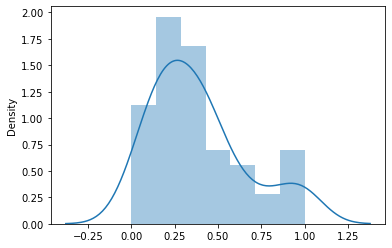

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


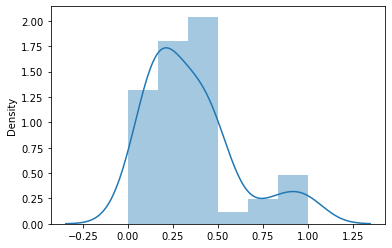

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


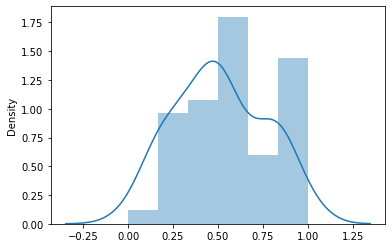

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


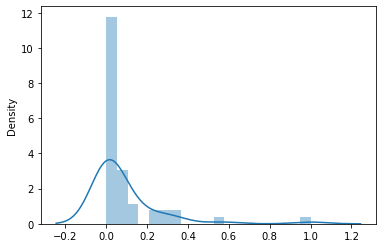

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


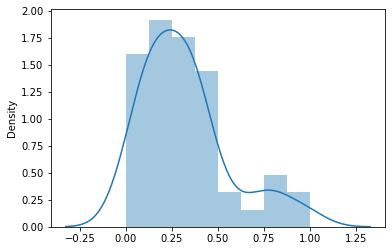

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


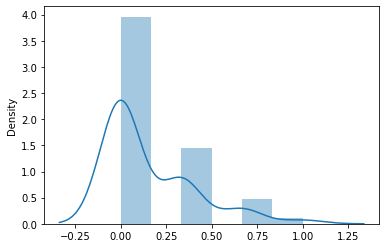

In [ ]:
for i in numeric_columns:

    sns.distplot(normalization_fun(data[i]))
    plt.show()

# Feature of Normal Distribution
The normal distribution is the most important probability distribution in statistics because many continuous data in nature and psychology displays this bell-shaped curve when compiled and graphed.

The most powerful (parametric) statistical tests used by psychologists require data to be normally distributed. If the data does not resemble a bell curve researchers may have to use a less powerful type of statistical test, called non-parametric statistics.

We can standardized the values (raw scores) of a normal distribution by converting them into z-scores.

This procedure allows researchers to determine the proportion of the values that fall within a specified number of standard deviations from the mean (i.e. calculate the empirical rule).

The empirical rule in statistics allows researchers to determine the proportion of values that fall within certain distances from the mean. The empirical rule is often referred to as the three-sigma rule or the 68-95-99.7 rule

1.The mean, mode and median are all equal.

2.The curve is symmetric at the center (i.e. around the mean, μ).

3.Exactly half of the values are to the left of center and exactly half the values are to the right.

4.The total area under the curve is 1.

# Positively Skewed and Negatively Skewed Normal Distribution

Besides positive and negative skew, distributions can also be said to have zero or undefined skew. In the curve of a distribution, the data on the right side of the curve may taper differently from the data on the left side. These taperings are known as "tails." Negative skew refers to a longer or fatter tail on the left side of the distribution, while positive skew refers to a longer or fatter tail on the right.


$$
 skewness = \frac{3(mean-median)}{standarddeviation}
$$



In [ ]:
def median_fun(a):
    k = len(data)/2
    if (len(a)%2==0):
        s_l=sorted(list(a),reverse=True)
        m=(s_l[int(k)-1]+s_l[int(k)])/2
        return (m)

In [ ]:
def  skewness_fun(a):
   a=((mean_fun(a)-median_fun(a)))/std_fun(a)
   return a

In [ ]:
for i in numeric_columns:
    print(i+"  Skewness is ",skewness_fun(data[i]))


Mthly_HH_Income  Skewness is  0.253835676742402
Mthly_HH_Expense  Skewness is  0.2772229970354436
No_of_Fly_Members  Skewness is  0.03994323218711281
Emi_or_Rent_Amt  Skewness is  0.49524937972151156
Annual_HH_Income  Skewness is  0.13441648734800632
No_of_Earning_Members  Skewness is  0.6328145078635634


In [ ]:
for i in numeric_columns:
    print(data[i].skew())

0.9246148763777229
1.1994608030097127
0.11367415455857431
3.403679844103547
1.1929490975818218
1.5933009869600223
